##**Importing package**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [80]:
data = pd.read_csv('assignment_shala_clustering.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [82]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [83]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [84]:
print("Min : {} and Max : {}".format(data.Age.min(),data.Age.max()))

Min : 18 and Max : 70


In [85]:
data.shape

(200, 5)

##**Data visualization**

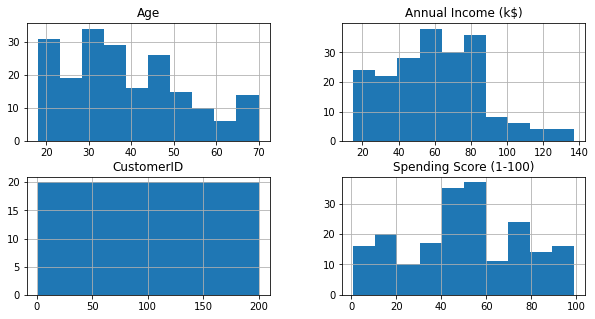

In [86]:
## Histogram 
data.hist(grid=True,figsize=(10,5))
plt.show()

In [0]:
label = data.Gender.value_counts().keys().tolist()

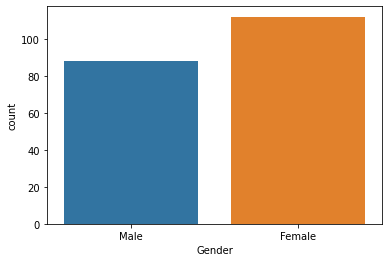

In [88]:
## countplot
sns.countplot(x="Gender", data=data)
plt.show()

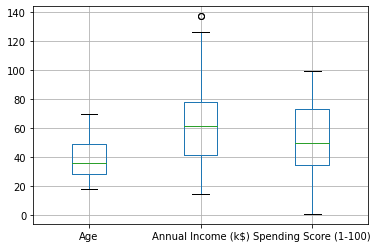

In [89]:
## Box plot
data[['Age','Annual Income (k$)','Spending Score (1-100)']].boxplot()
plt.show()

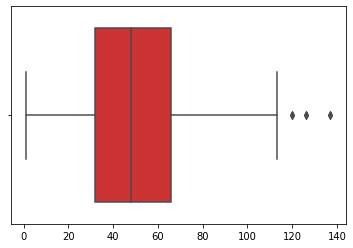

In [90]:
sns.boxplot(data[['Age','Annual Income (k$)','Spending Score (1-100)']],palette='Set1')
plt.show()

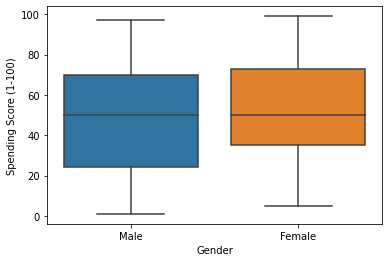

In [91]:
sns.boxplot(x=data['Gender'],y=data['Spending Score (1-100)'],data=data)
plt.show()

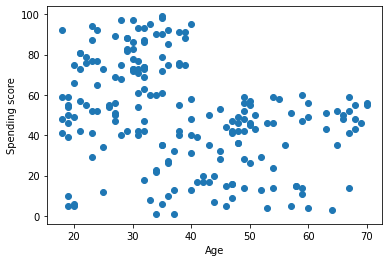

In [92]:
plt.scatter(x=data['Age'],y=data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending score')

plt.show()

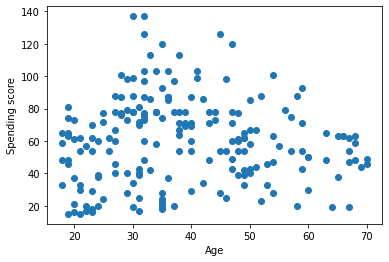

In [93]:
plt.scatter(x=data['Age'],y=data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Spending score')

plt.show()

In [0]:
data['Gender'] = data['Gender'].apply(lambda x: 0 if x=="Female" else 1)

In [95]:
data["Gender"].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [96]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [97]:
data = data.iloc[:,1:5]
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


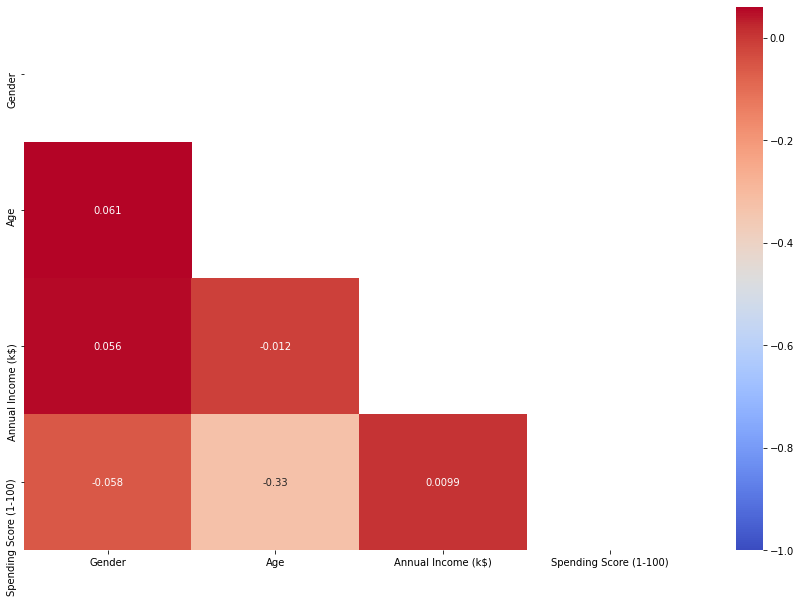

In [98]:
## Correlation plot
plt.figure(figsize=(15,10))
mask = np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(  
              data.corr() , 
              vmin = -1,
              cmap="coolwarm",
              annot=True,
              mask=mask          
           )
plt.show()

In [0]:
# Splitting our data into training set and new data set (futre data points)
X,y = train_test_split(data, test_size=.2)

In [0]:
# Our initial guess will be 4 cluster that can assist us to group the similar 
# instance together
clusters = 4
kmeans = KMeans(n_clusters=clusters)
y_pred = kmeans.fit_predict(X)

In [124]:
# Checking within-cluster sum of squares
kmeans.inertia_

83705.75457251084

As we know KMeans find n clusters centroids (n is number of cluster we ask our algo to consider) and assign each instance to the closest centroid. We can have a look at the four centroids that algorithms found


Note : Here we are into two dimensions so we need two data points to represents our centroids

In [123]:
kmeans.cluster_centers_ 

array([[ 0.4       , 53.2       , 46.76363636, 39.30909091],
       [ 0.38095238, 25.21428571, 39.52380952, 62.57142857],
       [ 0.46875   , 41.1875    , 88.125     , 19.75      ],
       [ 0.4516129 , 32.90322581, 85.51612903, 82.06451613]])

#### Assign new instances to the cluster whose centroid is the closet

In [125]:
kmeans.predict(y)

array([2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 0, 1, 3, 3, 1, 3, 0, 2, 2, 1, 3, 0,
       2, 3, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 3, 0, 0, 1, 1, 0], dtype=int32)

In [127]:
kmeans.transform(y)

array([[ 39.72160559,  62.24055903,  10.66046471,  66.2731396 ],
       [ 64.84727895,  31.0004846 ,  93.79110037,  55.48931894],
       [ 17.58942207,  40.67854878,  38.53271996,  47.46577715],
       [ 21.74619184,  38.1972518 ,  61.48034652,  77.2081393 ],
       [ 17.38982319,  47.03424839,  58.39431058,  65.78385918],
       [ 47.67834028,  35.71889653,  56.11613411,  15.489851  ],
       [ 85.38387407,  79.81574942,  75.5361371 ,  29.34939687],
       [ 34.90775566,  23.73828629,  46.4329679 ,  36.51645674],
       [ 48.76387025,  23.09053708,  87.37109366,  67.33737878],
       [ 71.05750901,  57.20499102,  75.72537889,  12.95276779],
       [ 14.35164056,  41.96859991,  50.42403205,  73.11656624],
       [ 23.36638116,  21.37826105,  53.99150866,  60.66885261],
       [ 51.2837609 ,  47.96458562,  44.23257293,  19.15134965],
       [ 49.53315277,  34.21405375,  60.91045073,  16.43854636],
       [ 61.51634332,  30.97051666,  97.50202822,  71.52373845],
       [ 59.44643537,  44

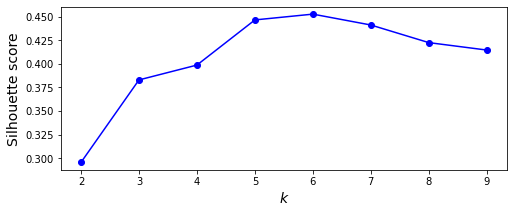

In [130]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

As you see above, 6 cluster is slightly a good choice to consider. So lets do kmeans using 6 clusters and plot the results 

##**Repeat the same code**

In [0]:
# Our initial guess will be 4 cluster that can assist us to group the similar 
# instance together
clusters = 6
kmeans = KMeans(n_clusters=clusters)
y_pred = kmeans.fit_predict(X)

Note : Increasing k from 4 to 6 decreases the cluster sum of square <br/> 
That means points are now close to each other

In [131]:
# Checking within-cluster sum of squares
kmeans.inertia_

46389.979524792376

In [132]:
kmeans.cluster_centers_ 

array([[ 0.31578947, 26.        , 26.31578947, 77.36842105],
       [ 0.5       , 42.82142857, 90.39285714, 17.64285714],
       [ 0.46666667, 32.66666667, 86.06666667, 82.86666667],
       [ 0.41666667, 56.72222222, 53.83333333, 48.94444444],
       [ 0.41176471, 45.76470588, 24.76470588, 18.17647059],
       [ 0.36666667, 27.66666667, 57.7       , 48.16666667]])